# Computational Finance Exercise

## STUDENT CODE: VP5008RP

In [5]:
import matplotlib.pyplot as plt;
import numpy as np;
import math as m;

## Exercise one

## The mean of the density curves

In [55]:
## Function for computing the mean 
def expected_stock_price(S0, mu, t):
    return S0*m.exp(mu*t)

In [61]:
## Mean for SO = 1, mu = 0.05 and t = 1
print("The mean for t=1 is : ", expected_stock_price(1, 0.05, 1))
      

## Mean for SO = 1, mu = 0.05 and t = 4
print("The mean for t=4 is : ", expected_stock_price(1, 0.05, 4))

The mean for t=1 is :  1.0512710963760241
The mean for t=4 is :  1.2214027581601699


## The Variance of the density curves

In [62]:
## Function for computing the variance
def variance(S0, mu, sigma, t):
    return S0**2*m.exp(2*mu*t)*(m.exp(sigma**2*t)-1)

In [63]:
## The variance for SO = 1, mu = 0.05, sigma = 0.3 and t = 1
print("The variance for t=1 is : ", variance(1, 0.05, 0.3, 1))
      

## The variance for SO = 1, mu = 0.05, sigma = 0.3 and t = 4
print("The variance for t=4 is : ", variance(1, 0.05, 0.3, 4))

The variance for t=1 is :  0.10407867958160391
The variance for t=4 is :  0.6464515228555481


In [64]:
## The variance for SO = 1, mu = 0.05, sigma = 0.5 and t = 1
print("The variance for t=1 is : ", variance(1, 0.05, 0.5, 1))
      

## The variance for SO = 1, mu = 0.05, sigma = 0.5 and t = 4
print("The variance for t=4 is : ", variance(1, 0.05, 0.5, 4))

The variance for t=1 is :  0.3138966305176096
The variance for t=4 is :  2.563375269203404


## Exercise Two and Three.

In [44]:
class Black_Scholes_Simulation():
    """
    The simulation takes in N samples from the standard normal distribution, T, the period of the stock,
    S0 the initial stock price, r the growth factor and a list of sigmas, the volatility. This 
    Class is not a generalized class, the parameters need be changed to your preferred simulation.
    
    First we plot the Brownian path and use the trajectory to solve the Black_Scholes equation
    """
    def __init__(self, N,T, S0, r, sigma):
        self.N = N
        self.T = T
        self.dt = self.T/self.N
        self.S0 = S0
        self.r = r
        self.sigma = sigma
        self.trajectories = []
        self.Brownian_paths = []
        #self.increments = np.random.normal(0,m.sqrt(self.dt), int(self.N)) # generate standard Brownian paths 
        self.t = np.linspace(self.dt,1,self.N) # generating time steps for the paths
        #self.B = np.cumsum(self.increments)
         
        self.t_ = np.insert(self.t,0,0);
        
     ### Brownian path method  
        
    def Brownian_path(self):
        for i in range(len(self.sigma)):
            incre=np.random.normal(0,m.sqrt(self.dt), int(self.N))
            B = np.cumsum(incre)
            B_ = np.insert(B,0,0);
            self.Brownian_paths.append(B_)
            
            for i in self.sigma:
                S=self.S0*np.exp((self.r-(i**2)/2)*self.t+i*B)
                self.trajectories.append(S)
            
        plt.figure(figsize=(15,8))
        plt.plot(self.t_,self.Brownian_paths[0], label = "Path ONE") 
        plt.plot(self.t_,self.Brownian_paths[1], label = "Path TWO")
        plt.plot(self.t_,self.Brownian_paths[2], label = "Path THREE")
        plt.plot(self.t_,self.Brownian_paths[3], label = "Path FOUR")
        plt.title("Multiple Brownian trajectories")
        plt.xlabel("Time steps")
        plt.ylabel("Trajectory")
        plt.legend()
        plt.grid()
        
    ## The Black_Schoes formula for the given list of sigmas, here we used a list of four (4) sigmas, 
    ## , once altered, the plot must be altered to reflect the path as well.
    
    def Black_Scholes(self):    
        plt.figure(figsize=(15,8))
        
        ## Sigma specific trajectories
        plt.plot(self.t, self.trajectories[0], label = "sigma =0.2")  
        plt.plot(self.t, self.trajectories[1], label = "sigma = 0.3")
        plt.plot(self.t, self.trajectories[2], label = "sigma = 0.4")
        plt.plot(self.t, self.trajectories[3], label = "sigma = 0.5")
        plt.title("Multiple Brownian trajectories for different sigma")
        plt.xlabel("Time steps")
        plt.ylabel("Trajectory")
        plt.legend()
        plt.grid()

"""
Instantiating the class as GBM with predefined parameters. These parameters can be changed
to our satisfaction.
"""           
GBM = Black_Scholes_Simulation(1000, 1, 1,0.05, [0.2,0.3,0.4, 0.5])

## Exercise Two Output

### Brownian path generated from the standard normal distribution

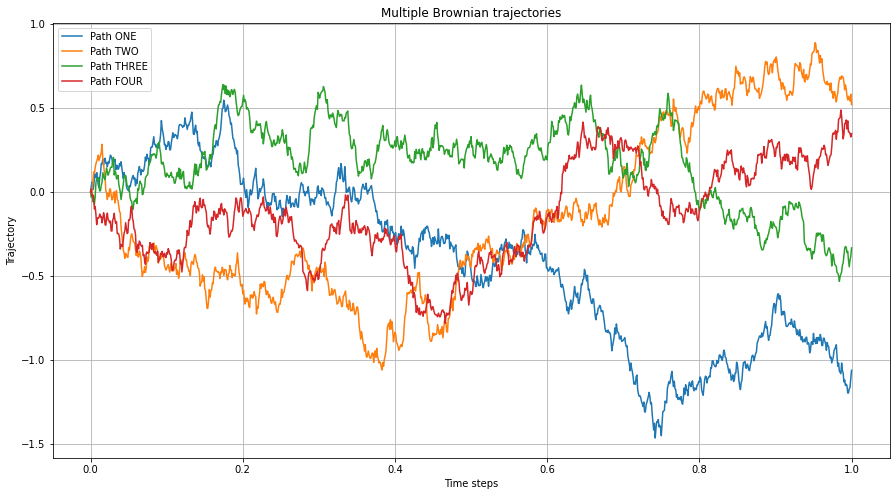

In [45]:
GBM.Brownian_path()

## Exercise Three Output

### Black and Scholes simulation with four different sigma values

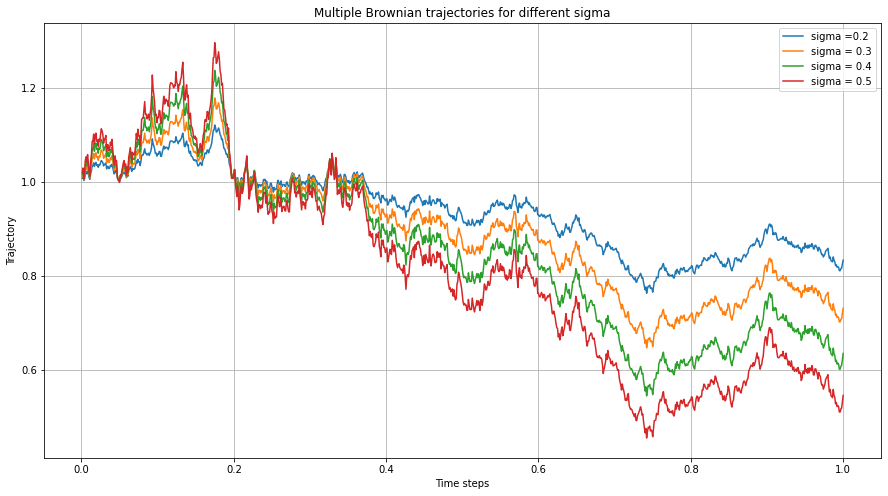

In [46]:
GBM.Black_Scholes()